In [1]:
import distl
import numpy as np

# Copy vs Deepcopy

`distl` assigns each distribution a `uniqueid` which tracks whether copies of underlying distributions should be treated as from the same underlying distribution or independent.

Let's first create a [gaussian](../api/Gaussian.md) distribution and access its automatically assigned random `uniqueid`.


In [2]:
d = distl.gaussian(5, 1)

In [3]:
print(d.uniqueid)

qXmRdLGhfHpHnaDtVqhD


When calling [copy](../api/BaseDistribution.copy.md), this `uniqueid` is retained which links the new copy to the original.

In [4]:
print(d.copy().uniqueid)

qXmRdLGhfHpHnaDtVqhD


Calling [deepcopy](../api/BaseDistribution.deepcopy.md), however, assigns a new random `uniqueid`, effectively unlinking the two distribution objects.

In [5]:
print(d.deepcopy().uniqueid)

tRqFpWAZWlZvWbzHHrYQ


# Implications in CompositeDistributions and math operations

By default, using math operators on distributions will use [copy](../api/BaseDistribution.copy.md).  To force unlinking the distributions, you must call [deepcopy](../api/BaseDistribution.deepcopy.md) manually.

Here we'll show that the original distribution and the distribution after applying math operators maintain the same `uniqueid`, by default, and are therefore sampled simultaneously.

In [6]:
d = distl.gaussian(5, 1)

In [7]:
print(d.uniqueid)

yzjcXLHzImrgJDsJGKms


In [8]:
print((5*d).uniqueid)

yzjcXLHzImrgJDsJGKms


We can see the implications of this in action when a [CompositeDistribution](../api/CompositeDistribution.md) contains two or more "copies" of the same underlying distribution.

In this case, we'll create a distribution for `d + 5*d`.  By default, the underlying references to `d` will remain linked when creating the CompositeDistribution (i.e. when sampling the CompositeDistribution, the same value will be drawn from all instances of `d` before applying the math operators between them).

In [9]:
comp = d + 5*d

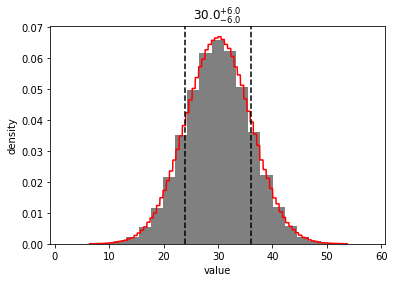

In [10]:
_ = comp.plot(show=True)

If we instead force the two instances to be unlinked by using a deepcopy, the two references to `d` are sampled independently before applying the math operators.  Here we can see that this does result in a slightly different distribution (in the case of simple operations between gaussian distributions, this only affects the spread on the resulting distribution).

In [11]:
comp_indep = d + 5*d.deepcopy()

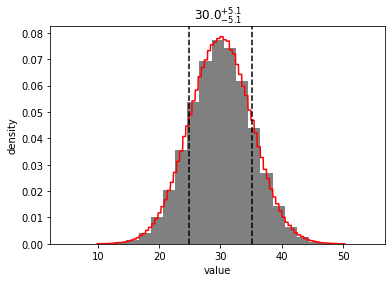

In [12]:
_ = comp_indep.plot(show=True)

# Implications in Function Distributions

Similarly, a [Function Distribution](../api/Function.md) will sample from any input distributions following these same rules.  This does work even if `vectorized=False`, although it does get more computationally expensive.

In [13]:
def custom_math(a, b):
    return a + 5*b

In [14]:
f = distl.function(custom_math, args=(d, d))

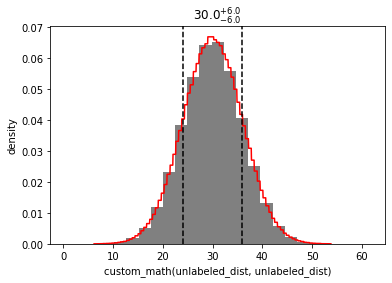

In [15]:
_ = f.plot(show=True)

In [16]:
f_indep = distl.function(custom_math, args=(d, d.deepcopy()))

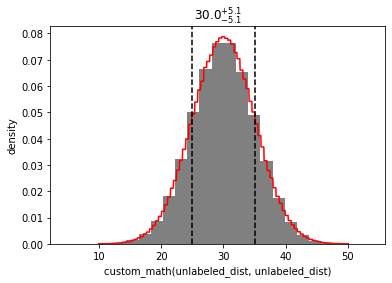

In [17]:
_ = f_indep.plot(show=True)

# Implications in DistributionCollections

This sampling logic can be seen even more clearly in the corner plots within [DistributionCollections](../api/DistributionCollection.md).  First we'll create a collection with `d` and `5*d`.  Since this creates a linked copy by default, we can see that the resulting samples strictly follow a 1:1 relationship.

In [18]:
dc = distl.DistributionCollection(d, comp, f)

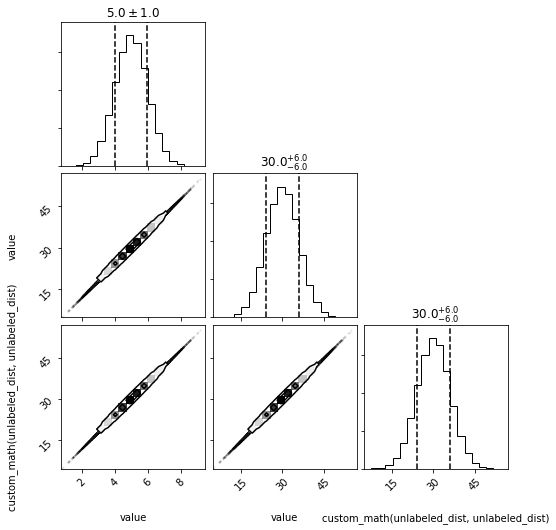

In [19]:
_ = dc.plot(show=True)

If instead we force a deepcopy, both resulting Gaussian distributions are sampled independently from each other and no longer show this correlation.

In [20]:
dc_indep = distl.DistributionCollection(d, comp_indep, f_indep)

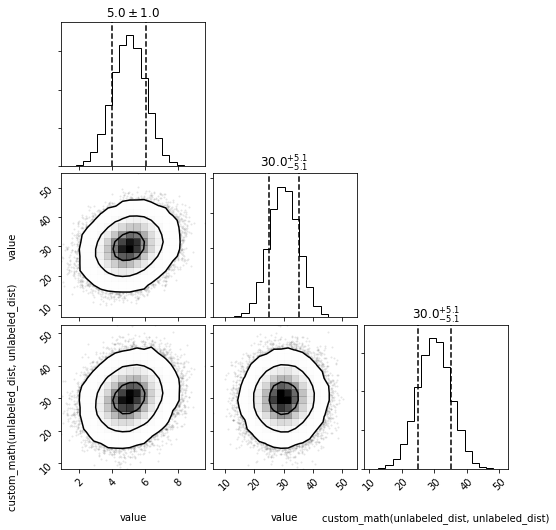

In [21]:
_ = dc_indep.plot(show=True)